In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({"Doc1": [3, 2, 8, 0, 0],
                   "Doc2": [1, 4, 12, 0, 0],
                   "Doc3": [0, 0, 0, 10, 11],
                   "Doc4": [0, 0, 0, 8, 5],
                   "Doc5": [1, 1, 1, 1, 1]},
                  index=["air", "water", "pollution", "democrat", "republican"]
)

In [3]:
df = df.T

In [4]:
df

air  water  pollution  democrat  republican
Doc1    3      2          8         0           0
Doc2    1      4         12         0           0
Doc3    0      0          0        10          11
Doc4    0      0          0         8           5
Doc5    1      1          1         1           1

In [5]:
from sklearn import datasets, decomposition, utils

In [6]:
model = decomposition.NMF(2)

In [7]:
W = model.fit_transform(df.values)

In [8]:
H = model.components_

In [9]:
print(W.round(2))
print()
print(H.round(2))

[[0.   2.2 ]
 [0.   3.22]
 [3.54 0.  ]
 [2.21 0.  ]
 [0.34 0.36]]

[[0.01 0.01 0.   3.05 2.87]
 [0.66 1.15 3.69 0.   0.  ]]


Weight of topics in different documents:

In [10]:
pd.DataFrame(W, index=df.index)

0         1
Doc1  0.000856  2.200488
Doc2  0.000000  3.224512
Doc3  3.538551  0.000000
Doc4  2.208714  0.000000
Doc5  0.338492  0.357664

Weight of words in different topics:

In [11]:
pd.DataFrame(H, columns=df.columns)

air     water  pollution  democrat  republican
0  0.014822  0.011359   0.000000  3.048571    2.872280
1  0.662553  1.148868   3.686711  0.000000    0.000294

### Data decomposition

Decomposition of data represented in **two** dimensions: MATRIX FACTORIZATION

- text: documents $\times$ terms
- surveys: subjects $\times$ questions
- electronic medical records: parients $\times$ diagnosis/drugs

Decomposition of data represented in **more** dimensions: TENSOR FACTORIZATION

- social networks: user $\times$ user (adjacencency matrix) $\times$ time
- text: authors $\times$ terms $\times$ time
- spectroscopy: solution sample $\times$ wavelength (emission) $\times$ wavelength (excitation)

### Why tensor factorization + Python?

- Matrix Factorization is already used in many fields
- Tensor Factorization (TF) is becoming very popular for multiway data analysis
- TF is very useful to explore time-varying network data
- But still, the most used tool is Matlab
- There's room for improvement in the Python libraries for TF

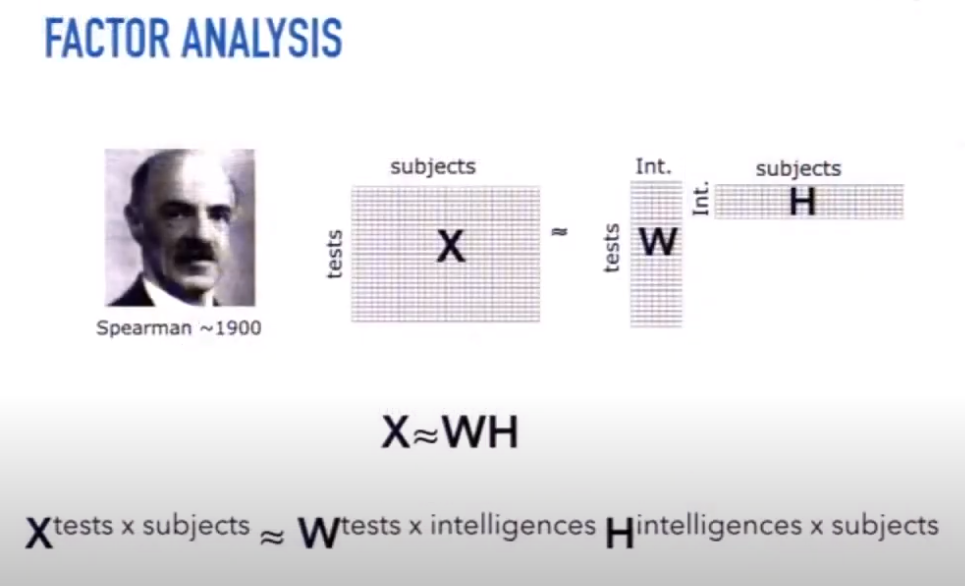

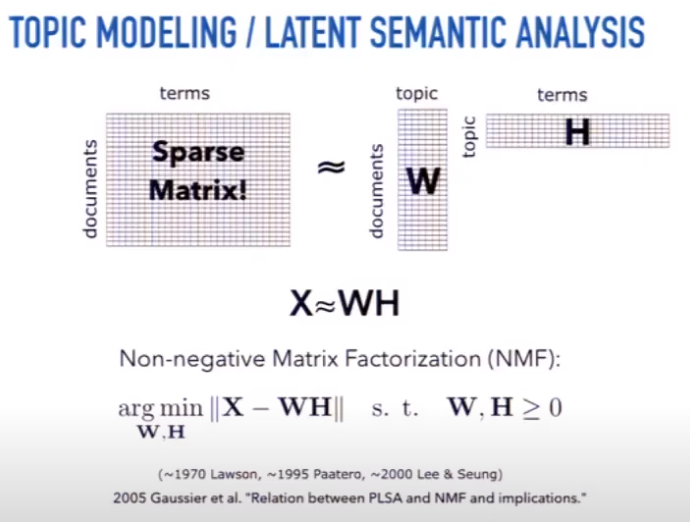

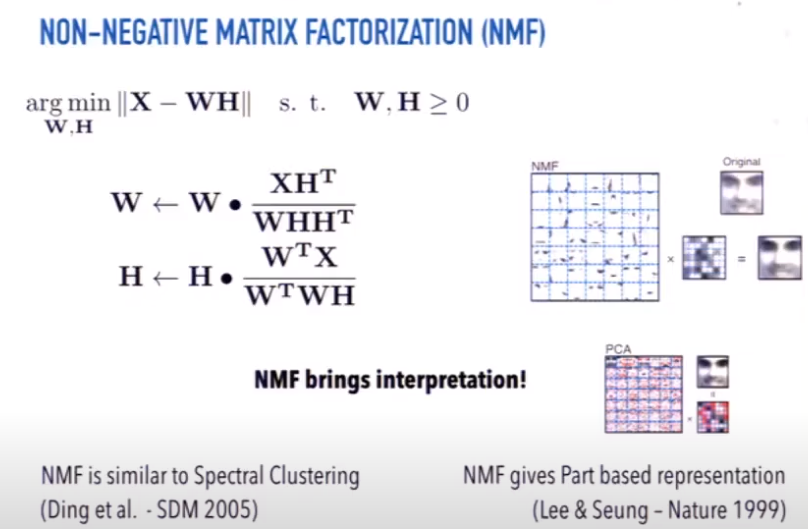

In [12]:
digits = datasets.fetch_openml("mnist_784")

In [13]:
A = utils.shuffle(digits.data)

In [14]:
nmf = decomposition.NMF(n_components=20, max_iter=1000)
W = nmf.fit_transform(A)
H = nmf.components_

/home/leo/Conda/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [15]:
import matplotlib.pyplot as plt

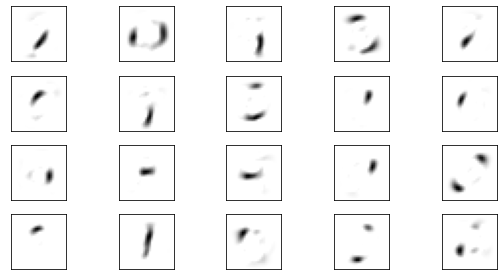

In [16]:
plt.rc("image", cmap="binary")
plt.figure(figsize=(8, 4))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(H[i].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

### Beyond matrices: high dimensional datasets

- Environmental analysis: measurement as a function of (Location, Time, Variable)
- Sensory analysis: score as a function of (Wine sample, Judge, Attribute)
- Process analysis: measurement as a function of (Batch, Variable, time)
- Spectroscopy: Intensity as a function of (Wavelength, Retention, Sample, Time, Location, ...)

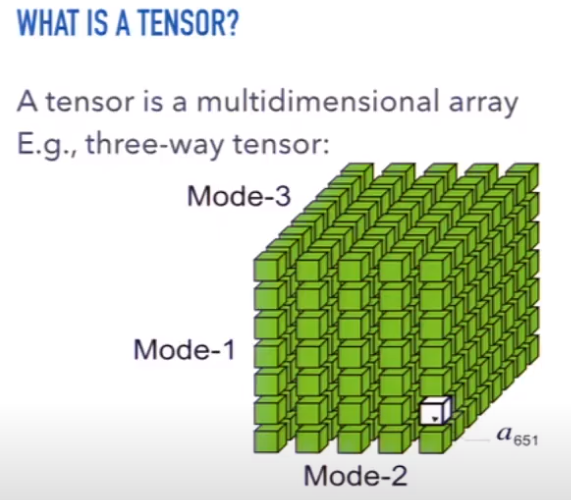

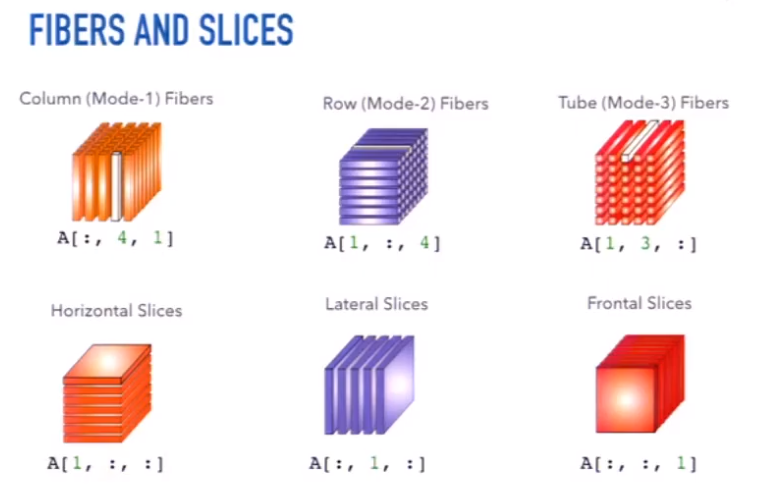

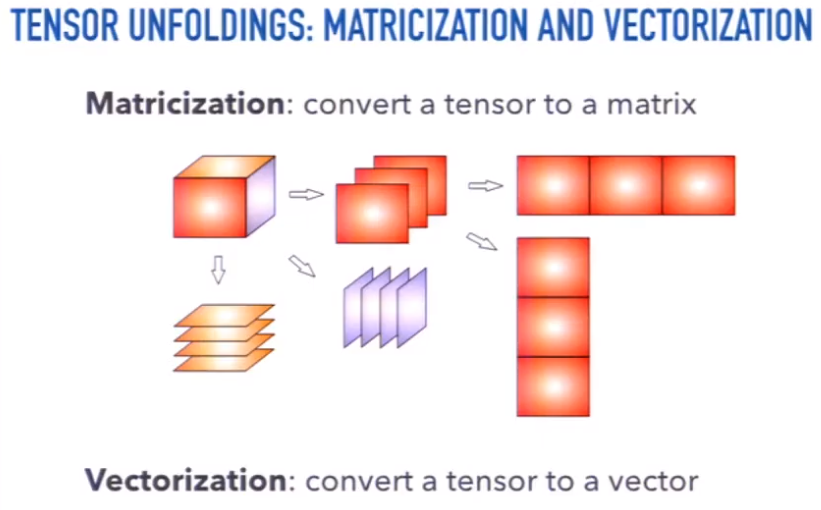

In [17]:
import numpy as np

In [18]:
T = np.arange(0, 24).reshape((3, 4, 2))

In [19]:
T

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19],
        [20, 21],
        [22, 23]]])

In [20]:
T.shape

(3, 4, 2)

In [21]:
for j in range(T.shape[2]):
    for i in range(T.shape[1]):
        print(T[:, i, j])

[ 0  8 16]
[ 2 10 18]
[ 4 12 20]
[ 6 14 22]
[ 1  9 17]
[ 3 11 19]
[ 5 13 21]
[ 7 15 23]


Notation-wise,
- scalars are denoted by lower case letters $x \in \mathbb{R}$
- vectors by lower case bold letters $\mathbf{x} \in \mathbb{R}^{I_{1}}$
- matrices by upper case bold letters $\mathbf{X} \in \mathbb{R}^{I_{1} \times I_{2}}$
- higher order tensors by upper case bold Euler script letters $\mathscr{X} \in \mathbb{R}^{I_{1} \times I_{2} \times \ldots \times I_{N}}$

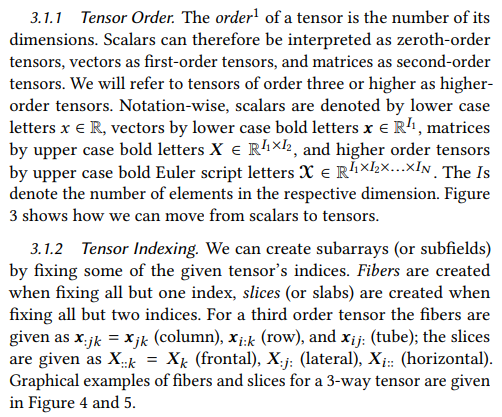

In [22]:
T.transpose((1, 2, 0))

array([[[ 0,  8, 16],
        [ 1,  9, 17]],

       [[ 2, 10, 18],
        [ 3, 11, 19]],

       [[ 4, 12, 20],
        [ 5, 13, 21]],

       [[ 6, 14, 22],
        [ 7, 15, 23]]])

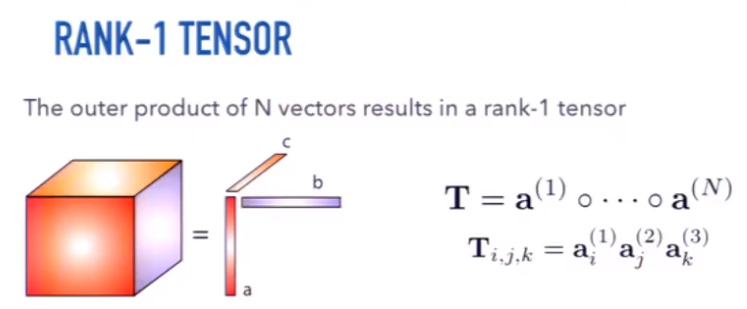

In [23]:
a = np.array([1, 2, 3])
b = np.array([1, 2, 3, 4])
c = np.array([1, 2])

T = np.zeros((a.shape[0], b.shape[0], c.shape[0]))
for i in range(a.shape[0]):
    for j in range(b.shape[0]):
        for k in range(c.shape[0]):
            T[i, j, k] = a[i] * b[j] * c[k]

In [24]:
T

array([[[ 1.,  2.],
        [ 2.,  4.],
        [ 3.,  6.],
        [ 4.,  8.]],

       [[ 2.,  4.],
        [ 4.,  8.],
        [ 6., 12.],
        [ 8., 16.]],

       [[ 3.,  6.],
        [ 6., 12.],
        [ 9., 18.],
        [12., 24.]]])

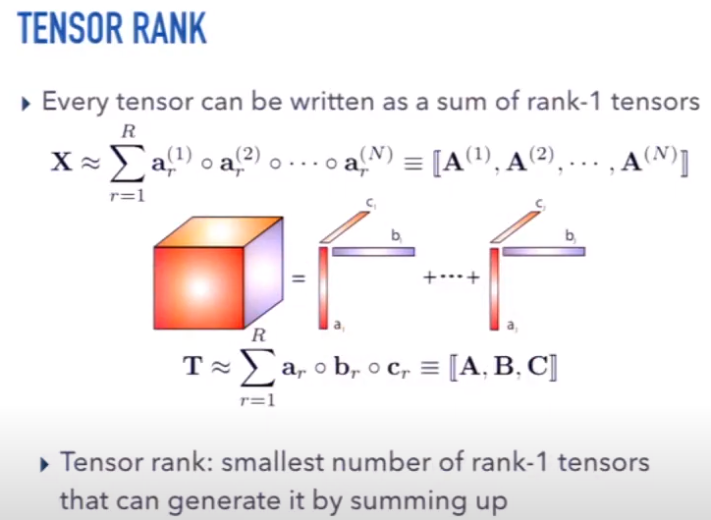

$\left[ \mathbf{A, B, C} \right]$ : Kruskal Tensor

In [25]:
A.shape

(70000, 784)

In [26]:
A = np.array([[1, 2, 3], [4, 5, 6]]).T
B = np.array([[1, 2, 3, 4], [5, 6, 7, 8]]).T
C = np.array([[1, 2], [3, 4]]).T

T = np.zeros((A.shape[0], B.shape[0], C.shape[0]))
for i in range(A.shape[0]):
    for j in range(B.shape[0]):
        for k in range(C.shape[0]):
            for r in range(A.shape[1]):
                T[i, j, k] += A[i, r] * B[j, r] * C[k, r]

In [27]:
T

array([[[ 61.,  82.],
        [ 74., 100.],
        [ 87., 118.],
        [100., 136.]],

       [[ 77., 104.],
        [ 94., 128.],
        [111., 152.],
        [128., 176.]],

       [[ 93., 126.],
        [114., 156.],
        [135., 186.],
        [156., 216.]]])

In [28]:
T = np.einsum("ir,jr,kr->ijk", A, B, C)

In [29]:
T

array([[[ 61,  82],
        [ 74, 100],
        [ 87, 118],
        [100, 136]],

       [[ 77, 104],
        [ 94, 128],
        [111, 152],
        [128, 176]],

       [[ 93, 126],
        [114, 156],
        [135, 186],
        [156, 216]]])

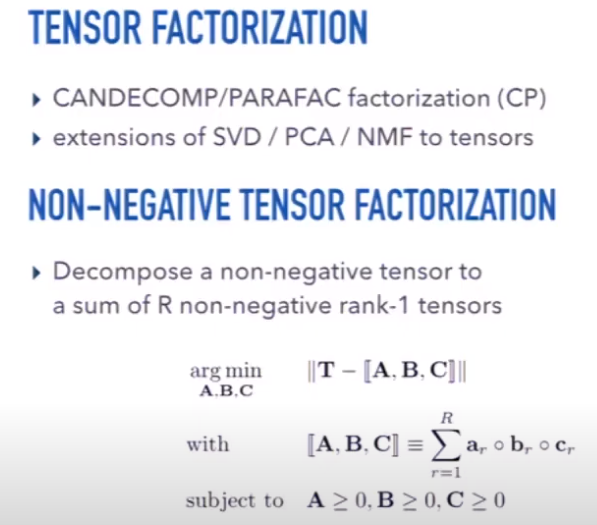

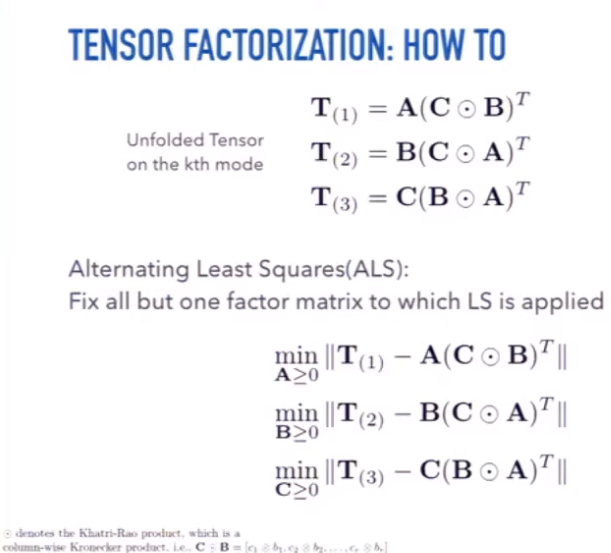

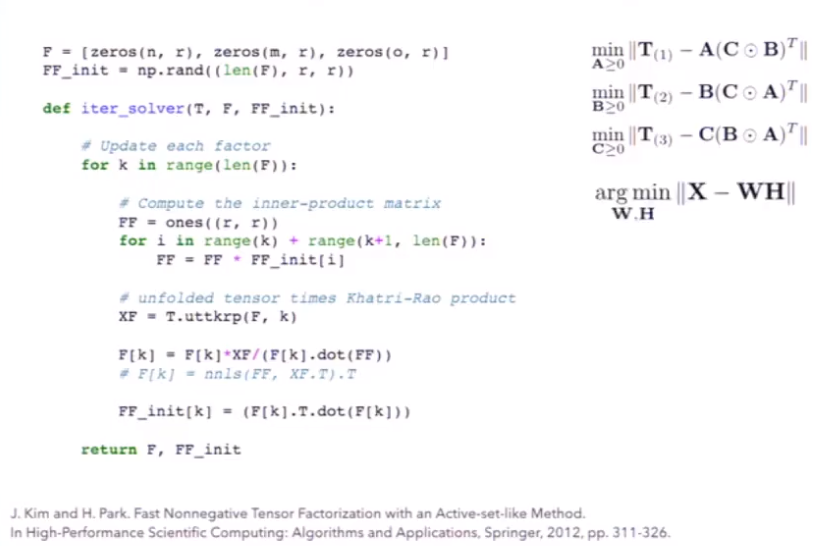

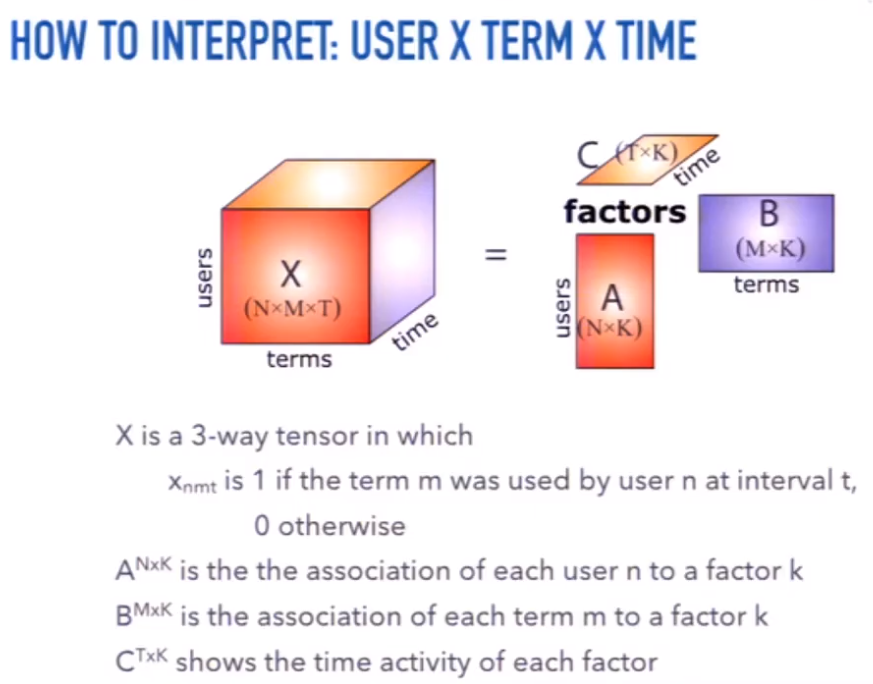